# Introduction to Singular Value Decomposition (SVD) & Principal Component Analysis (PCA) 

### Goals: 

### 1. Using SVD to invert a matrix : We will create a rectangular matrix A which is a dataset representing 30 variables (columns) and 200 measurements (rows) with Gaussian random data. We will make 1 variable collinear, 30th variable a weighted linear combination of 3 other randomly selected variables and then decompose the matrix using the SVD. Since this matrix X is not invertible, show how SVD can be used to invert the matrix successfully with pseudoinverse 

### 2. Understanding PCA and calculating the number of significant components in PCA using SVD: We will create a dataset X with 30 variables and 200 measurements using Gaussian random data. We will introduce 2 covariation patterns: for e.g. features 1:5 covary together positively, features 15:20 covary together negatively. Then we perform PCA on this dataset and plot the cumulative variance accounted for (VAF to determine how many PCs does it take to hit 90% of total variance and identify the 2 main PCs. To do this, create a separate matrix, with gaussian data and without covaration. Examine the average VAF as you move from one component to another. This is your threshold, to compare with.

In [232]:
from scipy import linalg as la
from scipy.stats import norm
from sklearn import datasets 
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

%matplotlib inline

## First create a matrix of random numbers


In [233]:
mat_size = 5
A = np.random.rand(mat_size, mat_size)
print(A)

[[0.00866654 0.75593657 0.04328461 0.66723582 0.88083696]
 [0.68788994 0.03510764 0.69359648 0.96278389 0.09308304]
 [0.64539752 0.85955971 0.89662984 0.00210265 0.4206644 ]
 [0.09136963 0.24290064 0.92375518 0.95734299 0.3281947 ]
 [0.30607999 0.98262376 0.74320248 0.26492611 0.68144658]]


## Convert numPy array of arrays to matrix and check its dimensions

In [234]:
B = np.asmatrix(A)
print(B.shape)

(5, 5)


## NumPy has function [svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) that can be used to compute the Singular value decomposition of matrix A which factorizes the matrix A into two unitary matrices $U$ and $V^T$, and a 1-D array $s$ of singular values (real, non-negative) such that $A = U S V^T$, where S is a suitably shaped matrix of zeros with main diagonal with values of array s (diagnoal version of array s).  
### U = Unitary matrix having left singular vectors as columns. Of shape $(M, K)$
### s = NumPy array of singular values, sorted in non-increasing order. Of shape $(K,)$ with $K = min(M, N)$
### $V^T$ = Unitary matrix having right singular vectors as rows. Of shape $(K, N)$ 

In [235]:
U, S, V = la.svd(B)
print(U.shape)
print(S.shape)
print(V.shape)

(5, 5)
(5,)
(5, 5)


## Note: S is an array => need to convert it into a square matrix using Numpy's Diag function

In [236]:
print(S)
type(S)

[2.70078591 1.22018614 0.96145555 0.45279485 0.01960861]


numpy.ndarray

In [237]:
S_sq = np.diag(S)
print(S_sq)

[[2.70078591 0.         0.         0.         0.        ]
 [0.         1.22018614 0.         0.         0.        ]
 [0.         0.         0.96145555 0.         0.        ]
 [0.         0.         0.         0.45279485 0.        ]
 [0.         0.         0.         0.         0.01960861]]


## Compute the inverse of square matrix B as $C = V^{-1} S^{-1} U^T$

In [238]:
C =  V.transpose() @ (la.inv(S_sq) @ U.transpose())
print(C)

[[  1.90778225  -0.09488252   3.95838527   0.12934279  -4.95888395]
 [ -8.16086438   6.17861952 -16.51356295  -6.91825886  23.23068384]
 [  1.54900544  -2.27010249   4.87980414   2.87815791  -6.09067435]
 [ -3.19295302   3.25683842  -7.64454266  -2.6693004    9.68696876]
 [ 10.4627382   -7.65708209  19.683998     7.81656214 -26.92644419]]


 ## If the SVD of square matrix B is correct then $B.C = I_{n}$ where $I_{n}$ is the identity matrix We can check by taking the difference $B.C - I_{n} = 0_n$ and rounding the values. If SVD worked we should get a nxn matrix of zeros!

In [239]:
id = B @ C
delta = id - np.identity(mat_size)
print(delta.round())

[[ 0. -0.  0.  0. -0.]
 [ 0. -0.  0.  0.  0.]
 [-0. -0.  0.  0. -0.]
 [-0. -0.  0.  0. -0.]
 [-0.  0. -0. -0.  0.]]


## Next we create a matrix A where the last column is a linear combination of 3 other columns
## Since this matrix does not have all L.I. columns, it will be singular. 
## We can use this to demonstrate how SVD can be used to perform a matrix inversion like operation.

In [240]:
mu, sigma = 0, 1 # Set normal distribution parameters
nvars, nobs = 30, 200 # Set mnumber of variables and observations
A = np.random.randn(nobs, nvars)
print(A)
A.shape

[[-0.05722078 -0.41706163  0.43838094 ... -0.81973102 -0.17223646
  -1.44036665]
 [-1.03483074 -0.11518117  0.31855248 ... -1.85333811 -0.86814697
  -0.73210343]
 [-0.18065188 -0.12189498 -1.07763493 ...  1.22274064  2.27111465
   0.02509031]
 ...
 [-1.31623629  0.10464416 -2.3419933  ... -0.14459709  1.23487534
  -1.42183102]
 [ 0.03281447  0.94231287 -0.51121073 ... -0.25516459 -0.91205704
   0.25188089]
 [ 1.30311139 -0.8548659   0.86302615 ...  0.6130283  -0.2525896
  -1.29259405]]


(200, 30)

In [241]:
linear_comb_coeffs = np.asmatrix([2, 5, 7]).transpose()
dependent_cols = np.around(28*np.random.rand(3), decimals=0).astype('int')
print("We will replace last column of A with linear combination of columns: ", str(dependent_cols))
#print(dependent_cols)
#print(linear_comb_coeffs)
# print(A[:, dependent_cols].shape)
# print(linear_comb_coeffs.shape)
# We can compute the linear combination of the 3 columns chosen by mutiplying the matrix slice with coeffs column vector
x =  np.squeeze(np.asarray(A[:, dependent_cols] @ np.asmatrix(linear_comb_coeffs)))
# print(x)
# print(x.shape)
# y = np.squeeze(np.asarray(x))
# print(y.shape)
# print(type(y))
# print(A[:, -1].shape)
# print(type(A[:, -1]))
A[:, -1] = x
print("Condition number of matrix A is: ", np.linalg.cond(A))
print("1/epsilon is : ", 1/sys.float_info.epsilon)
# print(np.spacing)
if np.linalg.cond(A) < 1/sys.float_info.epsilon:
    i = np.linalg.inv(A)
else:
    #Singular as expected!
    print("Condition number of matrix A >= 1/epsilon") 
    print("Matrix A is singular!")

We will replace last column of A with linear combination of columns:  [23 21 23]
Condition number of matrix A is:  3.882937690539721e+16
1/epsilon is :  4503599627370496.0
Condition number of matrix A >= 1/epsilon
Matrix A is singular!


## To understand how SVD can be used to compute pseudoinverse, we construct a singular matrix and calculate it's SVD. 
### To create a singular matrix, we replace the last column of A with a linear combination of 3 other columns. Then we check that the new matrix is singular by calculating condition number of matrix A and comparing that with $\frac{1}{\epsilon}$ where $\epsilon$ is the smallest fraction > 0 that can be represented as a float. 
#### Note: NumPy defines [condition number of x](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html) as the norm of x times the norm of the inverse of x the norm which can be the usual L2-norm (root-of-sum-of-squares) or one of a number of other matrix norms $cond(A) = \|A\| \|A^{-1}\|$ 

### Since inverses are only defined for non-singular square matrices, we can compute something similar to an inverse for a rectangular matrix or a singular square matrix called pseudeoinverse or [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse). The pseudo-inverse of a matrix A, denoted $A^+$, is defined as the matrix that ‘solves’ the least-squares problem $Ax = b$ i.e., if $\bar{x}$ is the solution, then $A^+$ is that matrix such that $\bar{x} = A^+b$.

### If $U S V^T = A$ is SVD of matrix A then $A^+ = V^{-1} S^{-1} U^T$, where U, V are orthogonal left and right singular matrices, S is a diagonal matrix consisting of A’s singular values in descening order, $S^{-1}$ is a diagonal matrix consisting of the reciprocals of A’s singular values.

#### NumPy has a handy function which computes the pseudoinverse [pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)

#### Let us compute the pseudoinverse $A^+$ of  rectangular matrix $A$ that we constructed before by setting the last column to be the linear combination of 3 other columns using SVD and pinv functions 

#### $A^{+}$ exists for any matrix $A$, but, when A has full rank i.e. the rank of A is $\min\{m,n\}$ then $A^{+}$ can be simplified:  When A has linearly independent columns, the pseudeoinvese constitutes a left inverse, since, in this case, $A^{+}A=I$  When A has linearly independent rows, pseudeoinverse is a right inverse because  $AA^{+}=I$.

In [242]:
B = np.asmatrix(A)
print("Shape of matrix A: ", A.shape)
print("Rank of Matrix A " , np.linalg.matrix_rank(B))
U, S, VT = la.svd(B, full_matrices=False)
m,n = A.shape
# print(U.shape)
# print(S.shape)
# print(VT.shape)
S_sq = np.diag(S)

print("Shape of U-transpose ", U.transpose().shape)
print("Shape of S inverse ", la.inv(S_sq).shape)
print("Shape of VT-transpose ", VT.transpose().shape)
# print(S_sq)
B_plus =  np.asmatrix(VT.transpose() @ la.inv(S_sq) @ U.transpose())
print("Shape of A+: ", B_plus.shape)
B_Bplus_B = B @ B_plus @ B
Bplus_B_Bplus = B_plus @ B @ B_plus
print("Shape of A.A+.A = ", B_Bplus_B.shape)
print("Shape of A+.A.A+ = ",Bplus_B_Bplus.shape)
# print("A+.A = \n", B_plus @ B)
# print("A.A+ = \n", B @ B_plus)
delta1 = B_Bplus_B - B
print("Check: A.A+.A = A should be all zeroes : \n", delta1.round())
delta2 = Bplus_B_Bplus - B_plus
print("Check: A+.A.A+ - A+ should be all zeroes : \n ", delta2.round())
P, r = la.pinv2(B, return_rank=True)
print("Rank of pseudoinverse:", r)
delta3 = B @ P @B - B
print("Check: pinv(A) - A+ should be all zeroes : \n", delta3.round())
delta4 = P @ B - np.asmatrix(np.identity(S.shape[0]))
print("Check: pinv(A).A  - I should be all zeroes : \n", delta3.round())

Shape of matrix A:  (200, 30)
Rank of Matrix A  29
Shape of U-transpose  (30, 200)
Shape of S inverse  (30, 30)
Shape of VT-transpose  (30, 30)
Shape of A+:  (30, 200)
Shape of A.A+.A =  (200, 30)
Shape of A+.A.A+ =  (30, 200)
Check: A.A+.A = A should be all zeroes : 
 [[-0.  0. -0. ...  0. -0.  0.]
 [-0.  0. -0. ... -0.  0.  0.]
 [ 0. -0.  0. ...  0.  0. -0.]
 ...
 [-0. -0.  0. ... -0.  0.  0.]
 [-0.  0. -0. ...  0. -0.  0.]
 [-0. -0.  0. ...  0. -0. -0.]]
Check: A+.A.A+ - A+ should be all zeroes : 
  [[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -0.00000000e+

In [243]:
# d = 10;    # number of obs
# k = 5;      # number of variables

# W = np.asmatrix(np.random.rand(d,k))
# print("W matrix is: ", W)
# S = W.transpose() @ W + np.diag(np.asmatrix(np.random.rand(1,k)))
# print("S matrix is: ", S)
# col_corr = np.corrcoef(S)

# # S = np.diag(1./np.sqrt(np.diag(S))) * S * np.diag(1./np.sqrt(np.diag(S)))
# print("Correlation matrix is: ", col_corr)
# print("Rank of Matrix W " , np.linalg.matrix_rank(W))

## Generating samples from correlated variables requires that the covariance matrix be postive definite and all eigenvalues $\lambda_i \ge 0$

### To generate correlated normally distributed random samples, one can first generate uncorrelated normally distributed samples, and then multiply them by a matrix C such that $C C^T= R$ where R is the desired covariance matrix. C can be created, for example, by using the Cholesky decomposition of R, or from the eigenvalues and eigenvectors of R.
### One approach is to generate positive semi-definite matrix for each group of correlated variables, here num_correlated_vars_block = 5 so each p.s.d matrix wil be 5 x 5 
### The symmetric matrix for covariances can be generated using $b_{sym} = \frac{b+b^T}{2}$ 
### However, this procedure seems to still generate atleast one $\lambda_i \ge 0$ so we have to look at alternate methods

In [251]:
# This method does not work 
# num_samples = 200
# num_correlated_vars_block = 5

# # # Generate correlation matrix for 5 variables that are correlated
# # Below method of using c*c^T =R to generate covariance matrx does not work
# p = np.random.uniform(0.7, 1, (num_correlated_vars_block, num_correlated_vars_block))
# p = np.random.rand(num_correlated_vars_block,num_correlated_vars_block)
# pos_cov_vars = np.dot(p, p.T) 
# pos_cov_vars = (p + p.T)/2

# # # np.fill_diagonal(pos_cov_vars, 1.000)
# # # Generate correlation matrix for 5 variables that are highly negatively correlated
# n = np.random.uniform(-0.8, -1, (num_correlated_vars_block, num_correlated_vars_block))
# # n = np.random.rand(num_correlated_vars_block,num_correlated_vars_block)
# np.fill_diagonal(neg_cov_vars, 1.000)

# # neg_cov_vars = np.dot(n, n.T) 
# neg_cov_vars = (n + n.T)/2

# # np.fill_diagonal(neg_cov_vars, np.array(-1.0 * np.diagonal(neg_cov_vars)))



# # Following code is inspired by SciPy Cookbook recipe: https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html 

# #  Matrices need to be positive semidefinite for eigenvalues to be computable based on random dist. 
# pos_cov_vars = sklearn.datasets.make_spd_matrix(5, random_state=None)
# neg_cov_vars = sklearn.datasets.make_spd_matrix(5, random_state=None)
# # print(x_corr_col_set1)


# # print(np.linalg.matrix_rank(pos_cov_vars))
# # print(np.linalg.matrix_rank(neg_cov_vars))
# print(pos_cov_vars)
# print(neg_cov_vars)

# # Generate samples from 5 independent normally distributed random
# # variables (with mean 0 and std. dev. 1).
# var_set1 = norm.rvs(size=(num_correlated_vars_block, num_samples))
# var_set2 = norm.rvs(size=(num_correlated_vars_block, num_samples))

# # print(corr_set1)
# # print(corr_set2)



# # Compute the eigenvalues and eigenvectors of correlation matrix and create the co-varying columns
# # Construct matrix of covarying columns c, so c*c' = r where r = correl matrix
# eigenvals_set1, eigen_vecs_set1 = la.eigh(pos_cov_vars)
# print(eigenvals_set1)
# x_corr_col_set1 = np.dot(eigen_vecs_set1, np.diag(np.sqrt(eigenvals_set1)))

# eigenvals_set2, eigen_vecs_set2 = la.eigh(neg_cov_vars)
# print(eigenvals_set2)
# x_corr_col_set2 = np.dot(eigen_vecs_set2, np.diag(np.sqrt(eigenvals_set2)))
# # print(x_corr_col_set1)
# # print(x_corr_col_set2)

# # L1 = la.cholesky(pos_cov_vars)
# # print(L1)

# # L2 = la.cholesky(neg_cov_vars)
# # print(L2)

# # x_corr_col_set1 = L1
# # x_corr_col_set2 = L2

# xblock_1 = np.dot(x_corr_col_set1, var_set1).T
# # print(xblock_1.shape)
# print(np.corrcoef(xblock_1))


# xblock_2 = np.dot(x_corr_col_set2, var_set2).T
# # print(xblock_2.shape)
# print(np.corrcoef(xblock_2))




## Part 2: PCA and SVD - Dimensionality reduction
### We will create a dataset X with 30 variables and 200 measurements using Gaussian random data. We will introduce 2 covariation patterns: for e.g. features 1:5 covary, features 15:20 covary together with high correlations (0.9+).
### Note: It is not always possible to create very highly negatively correlated variables easily. For n variables in this highly negatively correlated blocks some of the eigenvalues become negative which means the covariance matirx is not positive definitve and it cannot be decomposed. In general, if we have p variables that are highly negatively correlated,the negative correlation of any 2 variables has to be between $[\frac{-1}{(n-1)}, 1]$ For example, for 5 variables the most negative the correlation can go is -0.25

In [257]:
#  Create a group of 5 highly correlated variables
p = np.random.uniform(0.75, 1.0, (num_correlated_vars_block, num_correlated_vars_block))
p_mat = np.dot(p, p.T)
print(np.linalg.eigvals(p_mat))
print(p_mat)
print(np.corrcoef(p_mat))

# Create another group of highly correlated variables
# Note it is not possible to create very highly negatively correlated variables 
# For n variables in this highly negatively correlated blocks some of the eigenvalues become negative which means the covariance matirx is not positive definitve and it cannot be decomposed
# In general with n variables, the negative correlation of any 2 variables has to be between [-1/(n-1), 1]. For example, for 5 variables the most negative the correlation can go is -0.25
n = np.random.uniform(0.8, 1.0, (num_correlated_vars_block, num_correlated_vars_block))
n_mat = np.dot(n, n.T)
# np.fill_diagonal(n_mat, 1)
print(np.linalg.eigvals(n_mat))
print(n_mat)
print(np.corrcoef(n_mat))


samples = 200
data_block1 = np.random.multivariate_normal([0, 0, 0, 0, 0], p_mat, size=samples)
print(data_block1.shape)
print(np.corrcoef(data_block1.T))

data_block2 = np.random.multivariate_normal([0, 0, 0, 0, 0], n_mat, size=samples)
print(data_block2.shape)
print(np.corrcoef(data_block2.T))

nvars, nobs = 30, 200 # Set mnumber of variables and observations
X = np.random.randn(nobs, nvars)
X.shape

X[:, 4:9] = data_block1
X[:, 14:19] = data_block2

# print(np.corrcoef(X.T))


[1.93837068e+01 3.97188111e-02 1.30888189e-02 3.63204647e-03
 4.93261560e-05]
[[4.10880607 3.91326724 3.88041923 4.16953217 3.85830588]
 [3.91326724 3.75431042 3.70720113 3.95747862 3.67950141]
 [3.88041923 3.70720113 3.68703096 3.94186184 3.65783481]
 [4.16953217 3.95747862 3.94186184 4.25310441 3.92639214]
 [3.85830588 3.67950141 3.65783481 3.92639214 3.6369439 ]]
[[1.         0.99668002 0.99935031 0.99685067 0.99912521]
 [0.99668002 1.         0.99512454 0.98738815 0.9931405 ]
 [0.99935031 0.99512454 1.         0.99751507 0.9995445 ]
 [0.99685067 0.98738815 0.99751507 1.         0.99905069]
 [0.99912521 0.9931405  0.9995445  0.99905069 1.        ]]
[1.95274443e+01 2.26968817e-02 1.17399318e-02 2.65644753e-04
 1.30620651e-03]
[[3.89444778 3.81284699 3.94200629 3.91194393 3.92812624]
 [3.81284699 3.74304139 3.85233094 3.83518619 3.84221011]
 [3.94200629 3.85233094 4.00652441 3.96691476 3.98542225]
 [3.91194393 3.83518619 3.96691476 3.95083029 3.9527665 ]
 [3.92812624 3.84221011 3.9854

## Perform PCA on the X matrix with covarying columns

[0.35831329 0.67623453 0.70336205 0.728595   0.75190738 0.77381364
 0.79557171 0.81520418 0.83403917 0.85169758 0.86868181 0.88470951
 0.90042635 0.91431254 0.92754249 0.93992619 0.95122785 0.96201968
 0.97233951 0.98186948 0.99058927 0.9986181  0.99917917 0.99955943
 0.9997706  0.99993666 0.99997755 0.99999543 0.99999939 1.        ]


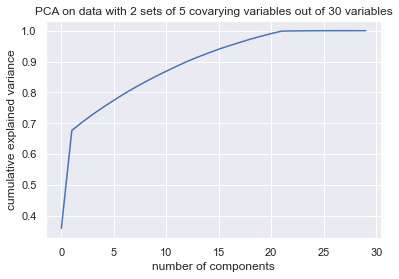

In [258]:

pca_y = PCA().fit(X)
var_expl = np.cumsum(pca_y.explained_variance_ratio_)
plt.plot(var_expl)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('PCA on data with 2 sets of 5 covarying variables out of 30 variables')
print(var_expl)

## Create a baseline matrix Y with random normal but uncorrelated variables

[0.06262929 0.12036952 0.17692946 0.22764802 0.27794804 0.32432236
 0.37004599 0.41220567 0.45404162 0.49382087 0.53175747 0.56859282
 0.60443654 0.63762517 0.66848928 0.69873055 0.7271215  0.7543709
 0.78074835 0.80612409 0.83081194 0.8543147  0.87693518 0.89818918
 0.91834858 0.9369852  0.95505068 0.9720183  0.98640572 1.        ]


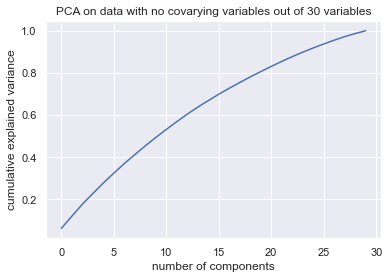

In [256]:
nvars, nobs = 30, 200 # Set mnumber of variables and observations
Y = np.random.randn(nobs, nvars)
Y.shape

# print(np.corrcoef(Y))

pca_y = PCA().fit(Y)
var_exp2 = np.cumsum(pca_y.explained_variance_ratio_)
plt.plot(var_exp2)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('PCA on data with no covarying variables out of 30 variables')
print(var_exp2)

## Conclusion
## Comparing the variance explained plots, we can clearly see that PCA has reduced the dimensionality of the problem: Over 65% of the variation can be explained by just 2 Principal components while 90% of the variation in the data is explained by only 13 PCs. For the uncorrelated dataset! 90% variation is explained by 25 PCs, clearly showing the gains with dimensionalty reduction

In [221]:
#  Example to create 2 covarying normal random variables with specified correlations
# samples = 200
# r = 0.9

# # Generate pearson correlated data with approximately cor(X, Y) = r
# import numpy as np
# data = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], size=samples)
# P, Q = data[:,0], data[:,1]
# print(P, Q)
# # That's it! Now let's take a look at the actual correlation:
# import scipy.stats as stats
# print ('r=', stats.pearsonr(P, Q)[0])